**Introducción**

El análisis exploratorio de datos (Exploratory Data Analysis, EDA) es una etapa fundamental en el proceso de análisis de datos. En este informe, realizaremos un EDA para el conjunto de datos de películas. El conjunto de datos contiene información variada sobre películas, como presupuesto, género, idioma original, sinopsis, popularidad, fechas de estreno, ingresos, duración, entre otros.



**Objetivo:**
El objetivo principal de este análisis es explorar y comprender la estructura y las características del conjunto de datos de películas. A través del EDA, buscaremos identificar patrones, tendencias y relaciones interesantes entre las variables presentes en el conjunto de datos. Además, también buscaremos obtener información relevante sobre las películas y los diferentes aspectos relacionados con ellas.


**Audiencia:**
Este informe está dirigido a profesionales del análisis de datos, entusiastas del cine y cualquier persona interesada en explorar y comprender las características de un conjunto de datos de películas. No se requiere un conocimiento profundo del dominio cinematográfico, ya que nos enfocaremos principalmente en el análisis de los datos.


**Estructura del informe:**
- Carga y descripción general del conjunto de datos: En esta sección, realizaremos la carga del conjunto de datos y brindaremos una descripción general de las columnas presentes, incluyendo su significado y tipo de datos.

- Análisis univariable: Exploraremos las variables de forma individual, examinando su distribución, estadísticas descriptivas y posibles valores atípicos o faltantes.

- Análisis bivariable: En esta sección, investigaremos las relaciones entre pares de variables, buscando correlaciones y patrones interesantes que puedan surgir.

- Análisis multivariable: Aquí examinaremos las interacciones entre múltiples variables, considerando su influencia conjunta en diferentes aspectos de las películas.

- Conclusiones: Resumiremos los hallazgos más relevantes del análisis y extraeremos conclusiones sobre el conjunto de datos de películas.

A través de este informe de EDA, se busca descubrir información valiosa y proporcionar una comprensión más profunda de las películas en el conjunto de datos. Este análisis sienta las bases para futuras investigaciones y aplicaciones relacionadas con el análisis de películas.

# Carga y descripción general del conjunto de datos:

En esta sección, realizaremos la carga del conjunto de datos y brindaremos una descripción general de las columnas presentes, incluyendo su significado y tipo de datos.
También se incluyen las librerias pertinentes para este análisis.

Se parte de los archivos csv previamente obtenidos

In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado y modelado
# ==============================================================================
from collections import Counter
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling
from fancyimpute import IterativeImputer

In [ ]:

# Será aplicado mas adelante para visualizar vacios
!pip install missingno
import missingno as msno

# Librerias para el archivo "credits.csv"
# import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import calendar

from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Cargar el archivo .csv en el dataframe
movies = pd.read_csv('proyecto1_movies.csv', low_memory=False)

In [ ]:
# Se puede revisar la informacion del dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   belongs_to_collection        45376 non-null  object 
 1   budget                       45376 non-null  float64
 2   genres                       45376 non-null  object 
 3   id                           45376 non-null  float64
 4   original_language            45365 non-null  object 
 5   overview                     44435 non-null  object 
 6   popularity                   45376 non-null  float64
 7   production_companies         45376 non-null  object 
 8   production_countries         45376 non-null  object 
 9   release_date                 45376 non-null  object 
 10  revenue                      45376 non-null  float64
 11  runtime                      45130 non-null  float64
 12  spoken_languages             45376 non-null  object 
 13  status          

In [ ]:
# Podemos visualizar los primeros elementos del df "movies"
movies.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,collection_poster_path_a,collection_backdrop_path_a,id_a,name_a,production_companies_name_a,production_companies_id_a,production_countries_iso_a,production_countries_name_a,spoken_language_iso_a,spoken_language_name_a
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16,35,10751","Animation,Comedy,Family",Pixar Animation Studios,3,US,United States of America,en,English
1,{},65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,NaN,NaN,"12,14,10751","Adventure,Fantasy,Family","TriStar Pictures,Teitler Film,Interscope Commu...","559,2550,10201",US,United States of America,"en,fr","English,Français"


In [ ]:
#Suma de todos los vacios del DataFrame
vacios_movies= movies.isna().sum()

# Orden de los datos del Dataframe de forma descentente (de mayor a menor)
vacios_movies.sort_values(ascending=False)

collection_backdrop_path_a     42116
collection_poster_path_a       41431
collection_id_a                40888
collection_name_a              40888
tagline                        24978
production_companies_id_a      11796
production_companies_name_a    11796
production_countries_name_a     6211
production_countries_iso_a      6211
spoken_language_name_a          3891
spoken_language_iso_a           3768
id_a                            2384
name_a                          2384
overview                         941
runtime                          246
status                            80
original_language                 11
release_year                       0
belongs_to_collection              0
return                             0
vote_count                         0
budget                             0
title                              0
spoken_languages                   0
revenue                            0
release_date                       0
production_countries               0
p

<Axes: >

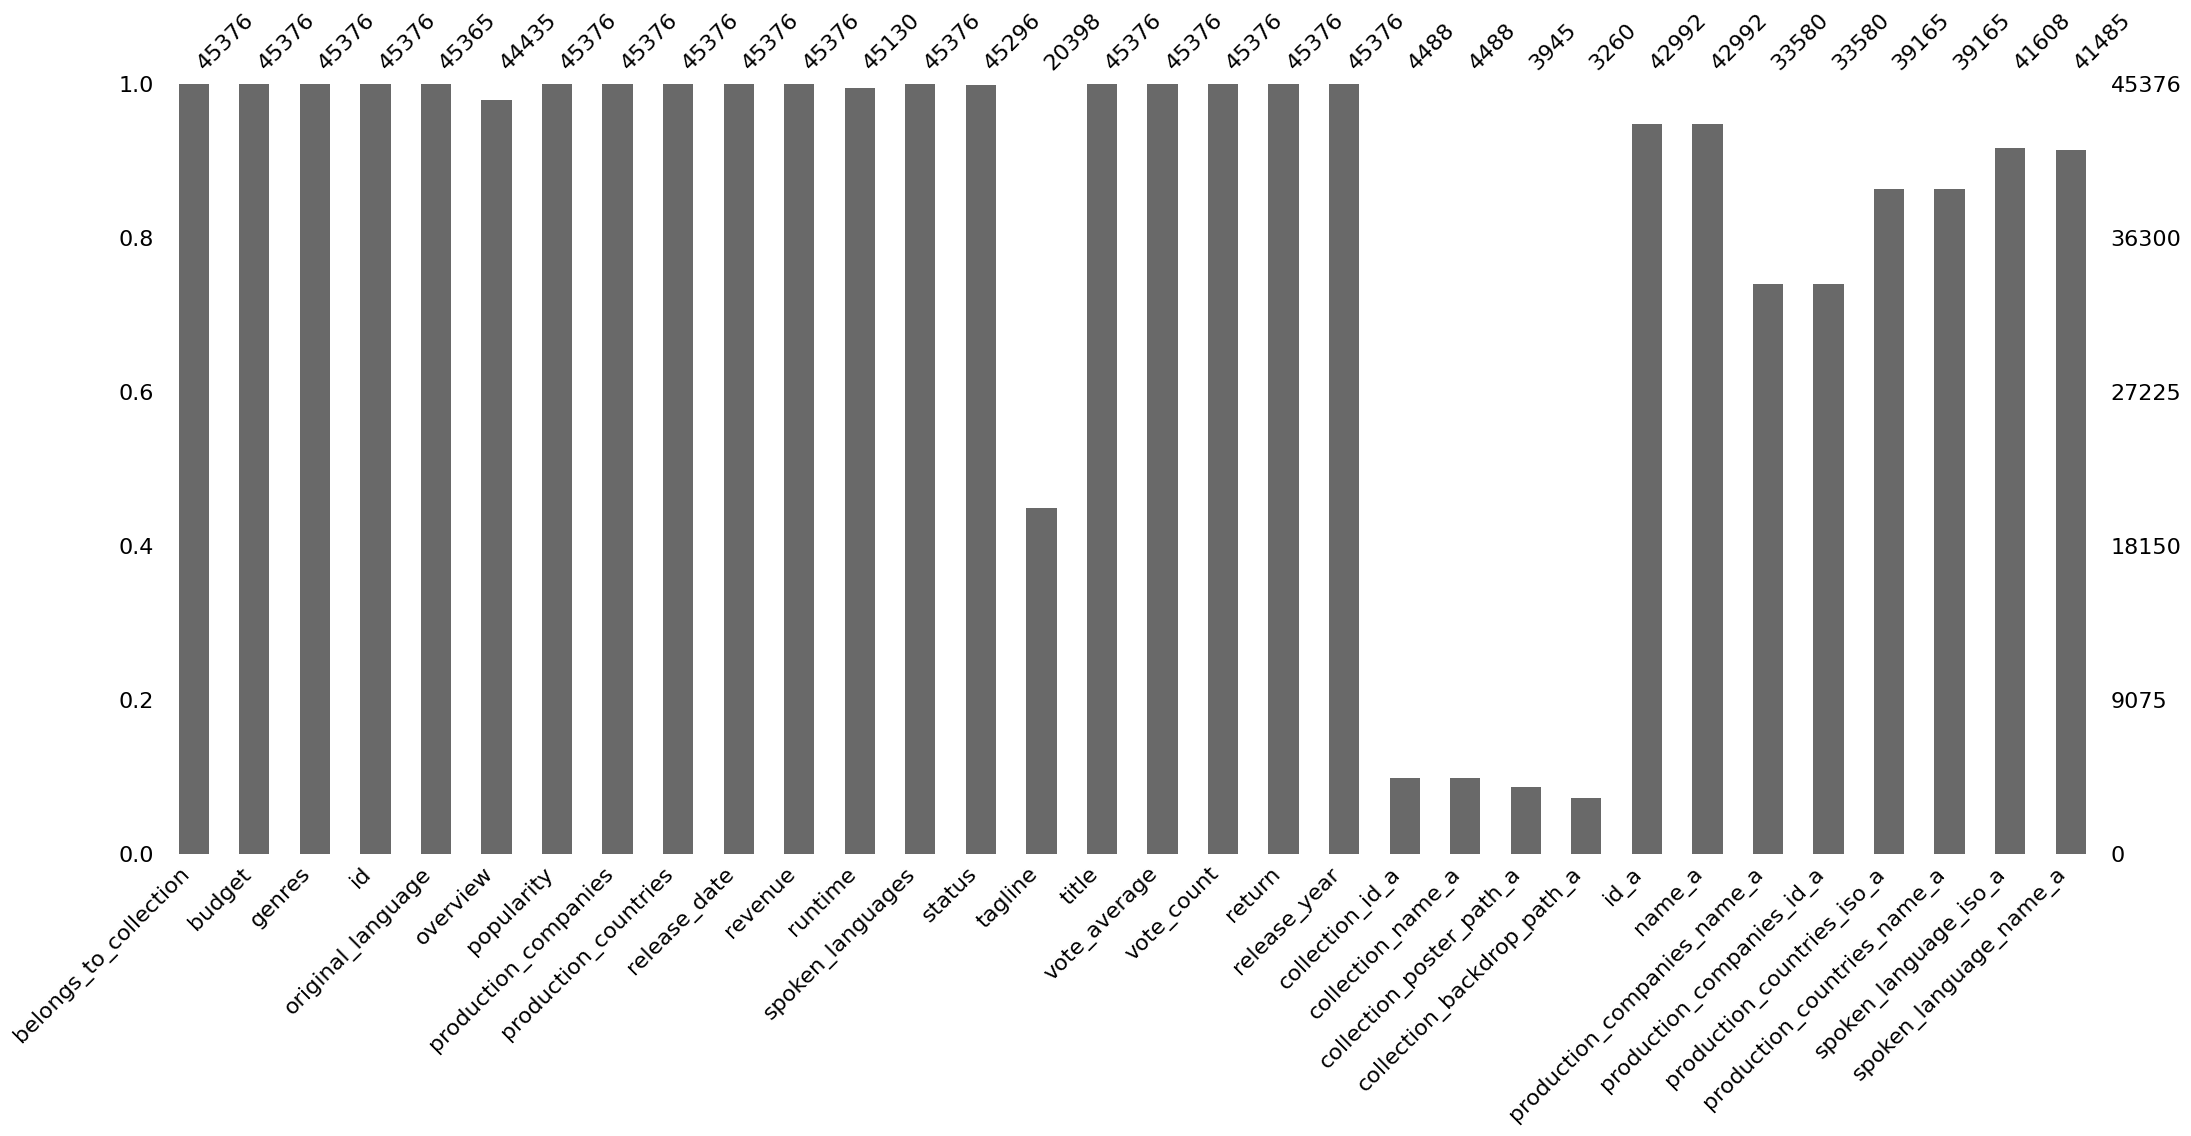

In [ ]:
# Los valores faltantes en el df "movies" se pueden visualizar
msno.bar(movies)

Dada la gran cantidad de datos faltantes en algunas de sus columnas, para poder realizar un análisis y posterior modelo de ML más adecuado, se procede a eliminar aquellos columnas que no brinden información relevante en este punto o que la cantidad de datos faltantes supere el 50% del total del dataset.

In [ ]:
# Revisión de la información contenida en la celda 5 "tagline"
cont = movies.iloc[5, movies.columns.get_loc("tagline")]
print(cont)
# Brinda información de la película, aunque resulta interesante, se decide eliminar esta columna por la cantidad de datos faltantes

A Los Angeles Crime Saga


A continuación se pueden eliminar aquellas columnas con gran cantidad de datos faltantes

In [ ]:
movies2 = movies.copy()
eliminar = ["collection_backdrop_path_a", "collection_poster_path_a", "collection_id_a", "collection_name_a", "tagline", "id_a"]
movies2 = movies2.drop(eliminar, axis=1)
movies2.info() # este df contiene 26 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   belongs_to_collection        45376 non-null  object 
 1   budget                       45376 non-null  float64
 2   genres                       45376 non-null  object 
 3   id                           45376 non-null  float64
 4   original_language            45365 non-null  object 
 5   overview                     44435 non-null  object 
 6   popularity                   45376 non-null  float64
 7   production_companies         45376 non-null  object 
 8   production_countries         45376 non-null  object 
 9   release_date                 45376 non-null  object 
 10  revenue                      45376 non-null  float64
 11  runtime                      45130 non-null  float64
 12  spoken_languages             45376 non-null  object 
 13  status          

Otras columnas con información redundante o que no serán aplicadas en este análisis son eliminadas

In [ ]:
movies3 = movies2.copy()
eliminar = ["belongs_to_collection", "genres", "production_companies", "production_countries", "production_companies_name_a", "production_companies_id_a", "production_countries_iso_a", "production_countries_name_a", "spoken_language_iso_a"]
movies3 = movies3.drop(eliminar, axis=1)
movies3.info() # este df contiene 17 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   budget                  45376 non-null  float64
 1   id                      45376 non-null  float64
 2   original_language       45365 non-null  object 
 3   overview                44435 non-null  object 
 4   popularity              45376 non-null  float64
 5   release_date            45376 non-null  object 
 6   revenue                 45376 non-null  float64
 7   runtime                 45130 non-null  float64
 8   spoken_languages        45376 non-null  object 
 9   status                  45296 non-null  object 
 10  title                   45376 non-null  object 
 11  vote_average            45376 non-null  float64
 12  vote_count              45376 non-null  float64
 13  return                  45376 non-null  float64
 14  release_year            45376 non-null

<Axes: >

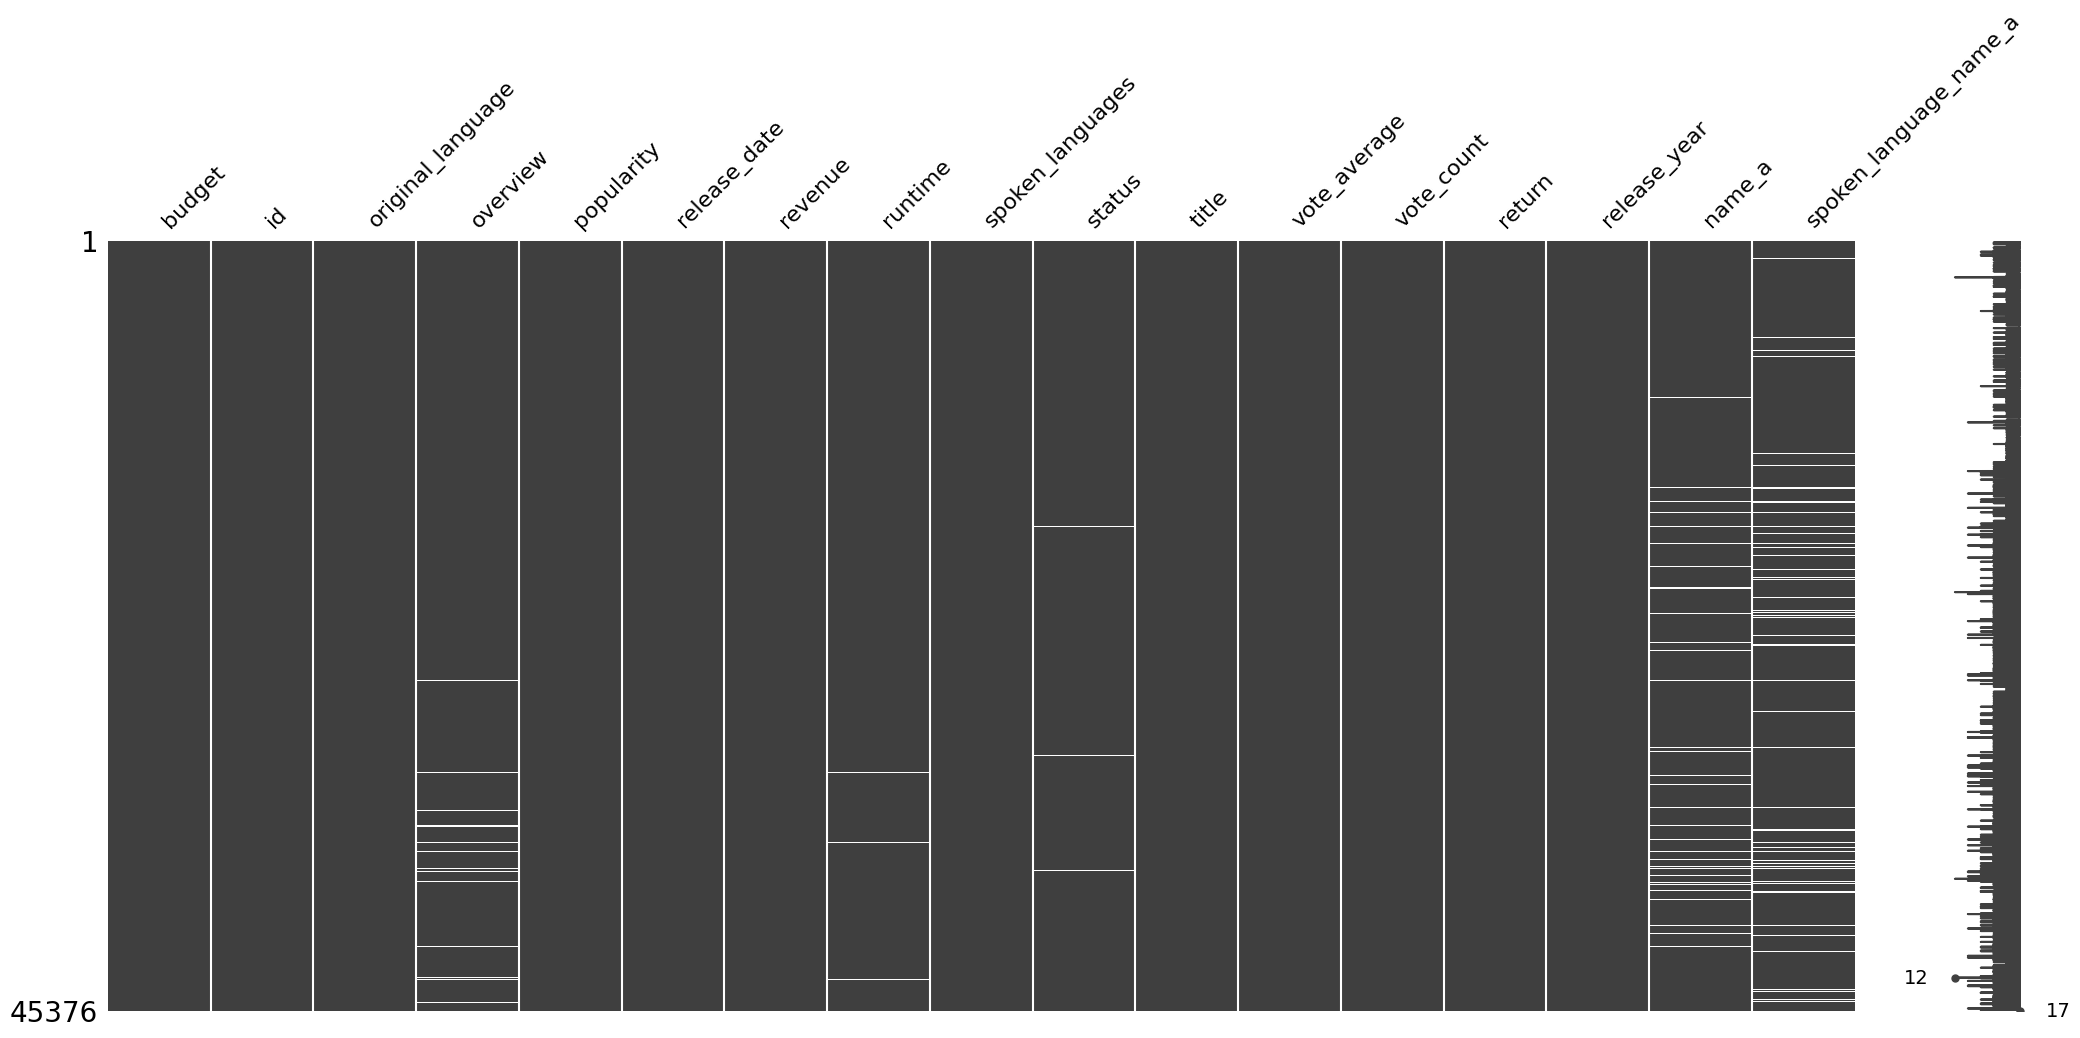

In [ ]:
# Para visualizar los datos faltantes en este nuevo df se puede aplicar la siguiente matriz
msno.matrix(movies3)

In [ ]:
# Es posible volver a revisar el df con los códigos previamente aplicados
# Suma de todos los vacios del DataFrame
vacios_movies= movies3.isna().sum()

# Orden de los datos del Dataframe de forma descentente (de mayor a menor)
vacios_movies.sort_values(ascending=False)

spoken_language_name_a    3891
name_a                    2384
overview                   941
runtime                    246
status                      80
original_language           11
vote_average                 0
release_year                 0
return                       0
vote_count                   0
budget                       0
title                        0
id                           0
revenue                      0
release_date                 0
popularity                   0
spoken_languages             0
dtype: int64

In [ ]:
# Se genera un df con aquellas variables numéricas:
movies_numericas = movies3[["budget", "popularity", "revenue",  "vote_average", "vote_count", "return"]]
print(movies_numericas)


           budget  popularity      revenue  vote_average  vote_count  \
0      30000000.0   21.946943  373554033.0           7.7      5415.0   
1      65000000.0   17.015539  262797249.0           6.9      2413.0   
2             0.0   11.712900          0.0           6.5        92.0   
3      16000000.0    3.859495   81452156.0           6.1        34.0   
4             0.0    8.387519   76578911.0           5.7       173.0   
...           ...         ...          ...           ...         ...   
45371         0.0    5.683753          0.0           5.7        26.0   
45372         0.0    0.178241          0.0           9.0         3.0   
45373         0.0    0.903007          0.0           3.8         6.0   
45374         0.0    0.003503          0.0           0.0         0.0   
45375         0.0    0.163015          0.0           0.0         0.0   

          return  
0      12.451801  
1       4.043035  
2       0.000000  
3       5.090760  
4       0.000000  
...          ...  
45

# Analisis univariable:

Se busca analizar las variables de forma individual, examinando su distribución, estadísticas descriptivas y posibles valores atípicos o faltantes

In [ ]:
# Principales Estadisticos:
movies_numericas.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,45376.0,4.232604e+06,1.743986e+07,0.0,0.00000,0.000000,0.000000,3.800000e+08
popularity,45376.0,2.926458e+00,6.009672e+00,0.0,0.38884,1.130454,3.691695,5.474883e+02
revenue,45376.0,1.123010e+07,6.438996e+07,0.0,0.00000,0.000000,0.000000,2.787965e+09
vote_average,45376.0,5.624070e+00,1.915423e+00,0.0,5.00000,6.000000,6.800000,1.000000e+01
vote_count,45376.0,1.100964e+02,4.917429e+02,0.0,3.00000,10.000000,34.000000,1.407500e+04
return,45376.0,6.600428e+02,7.469329e+04,0.0,0.00000,0.000000,0.000000,1.239638e+07


De esto es posible inferir:

- Budget (Presupuesto):
La mayoría de las películas tienen un presupuesto de 0.0, ya que el 25%, 50% y 75% de los valores son todos 0.0. Esto indica que hay una gran cantidad de películas con presupuesto cero o faltan datos.
La distribución de los presupuestos puede ser asimétrica a la derecha debido a la presencia de valores atípicos en el extremo superior (valor máximo de 380,000,000.0).

- Popularity (Popularidad):
La popularidad de las películas varía desde 0.0 hasta 547.49, con una media de aproximadamente 2.93.
Es probable que la distribución de la popularidad esté sesgada hacia la derecha debido a la presencia de valores atípicos en el extremo superior.
La mayoría de las películas pueden tener una popularidad relativamente baja, ya que el 75% de los valores se encuentran por debajo de 3.69.

- Revenue (Ingresos):
La mayoría de las películas tienen ingresos de 0.0, ya que el 25%, 50% y 75% de los valores son todos 0.0. Esto indica que hay una gran cantidad de películas sin ingresos o faltan datos.
Al igual que con el presupuesto, la distribución de los ingresos puede ser asimétrica a la derecha debido a la presencia de valores atípicos en el extremo superior (valor máximo de 2,787,965,087.0).

- Vote Average (Votación Promedio):
La votación promedio de las películas varía desde 0.0 hasta 10.0, con una media de aproximadamente 5.62.
La distribución de las votaciones promedio puede seguir una distribución normal o estar sesgada hacia la derecha debido a factores como la calidad de las películas y las preferencias de los votantes.
La mayoría de las películas pueden tener una votación promedio cercana a 6.0, ya que el 50% de los valores están por debajo de este umbral.

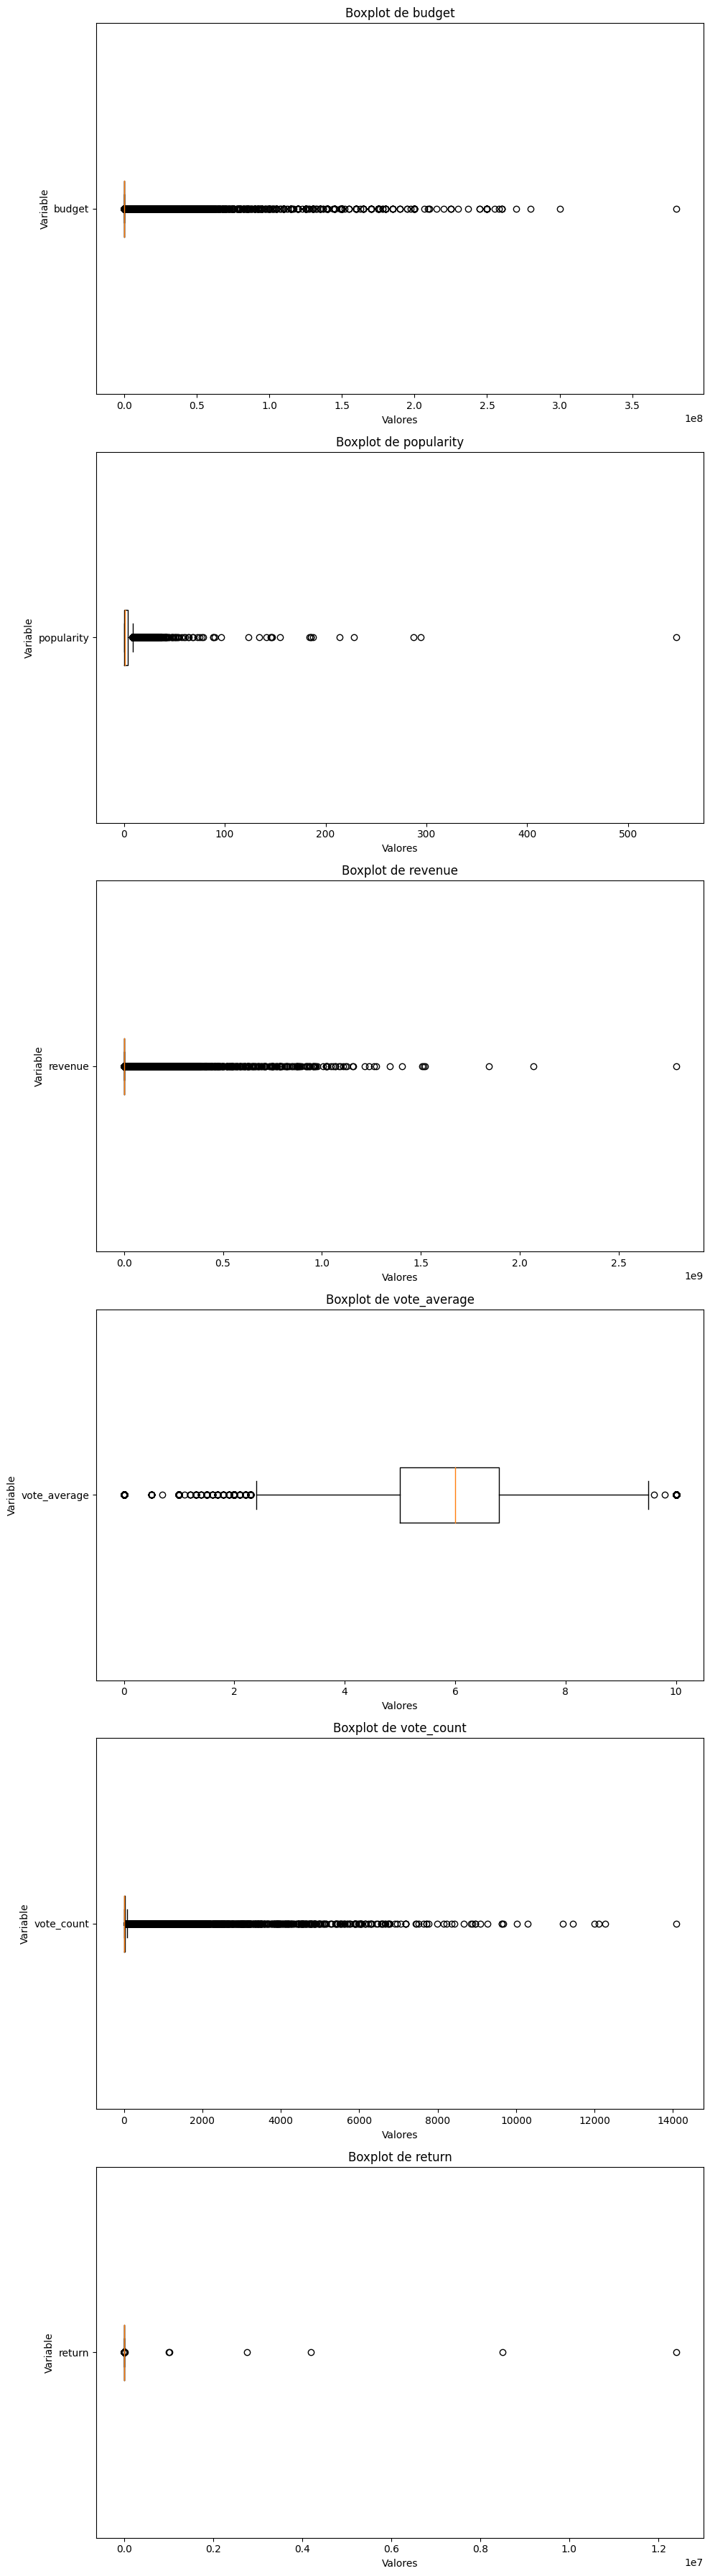

In [ ]:
# Podemos analizar de manera gráfica el comportamiento de algunas variables
# Variables a incluir en el boxplot
variables = ["budget", "popularity", "revenue", "vote_average", "vote_count", "return"]

# Crear una figura y un conjunto de ejes para cada variable
fig, axs = plt.subplots(len(variables), figsize=(10, 6 * len(variables)))

# Generar un boxplot para cada variable
for i, variable in enumerate(variables):
    ax = axs[i] if len(variables) > 1 else axs  # usar un solo eje si solo hay una variable

    # Crear el boxplot para la variable actual
    box_plot = ax.boxplot(movies_numericas[variable], vert=False)

    # Configurar los ejes y el título del gráfico
    ax.set_yticklabels([variable])
    ax.set_xlabel('Valores')
    ax.set_ylabel('Variable')
    ax.set_title(f'Boxplot de {variable}')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Estos gráficos confirman algunas apreciaciones previamente realizadas de estas variables numéricas

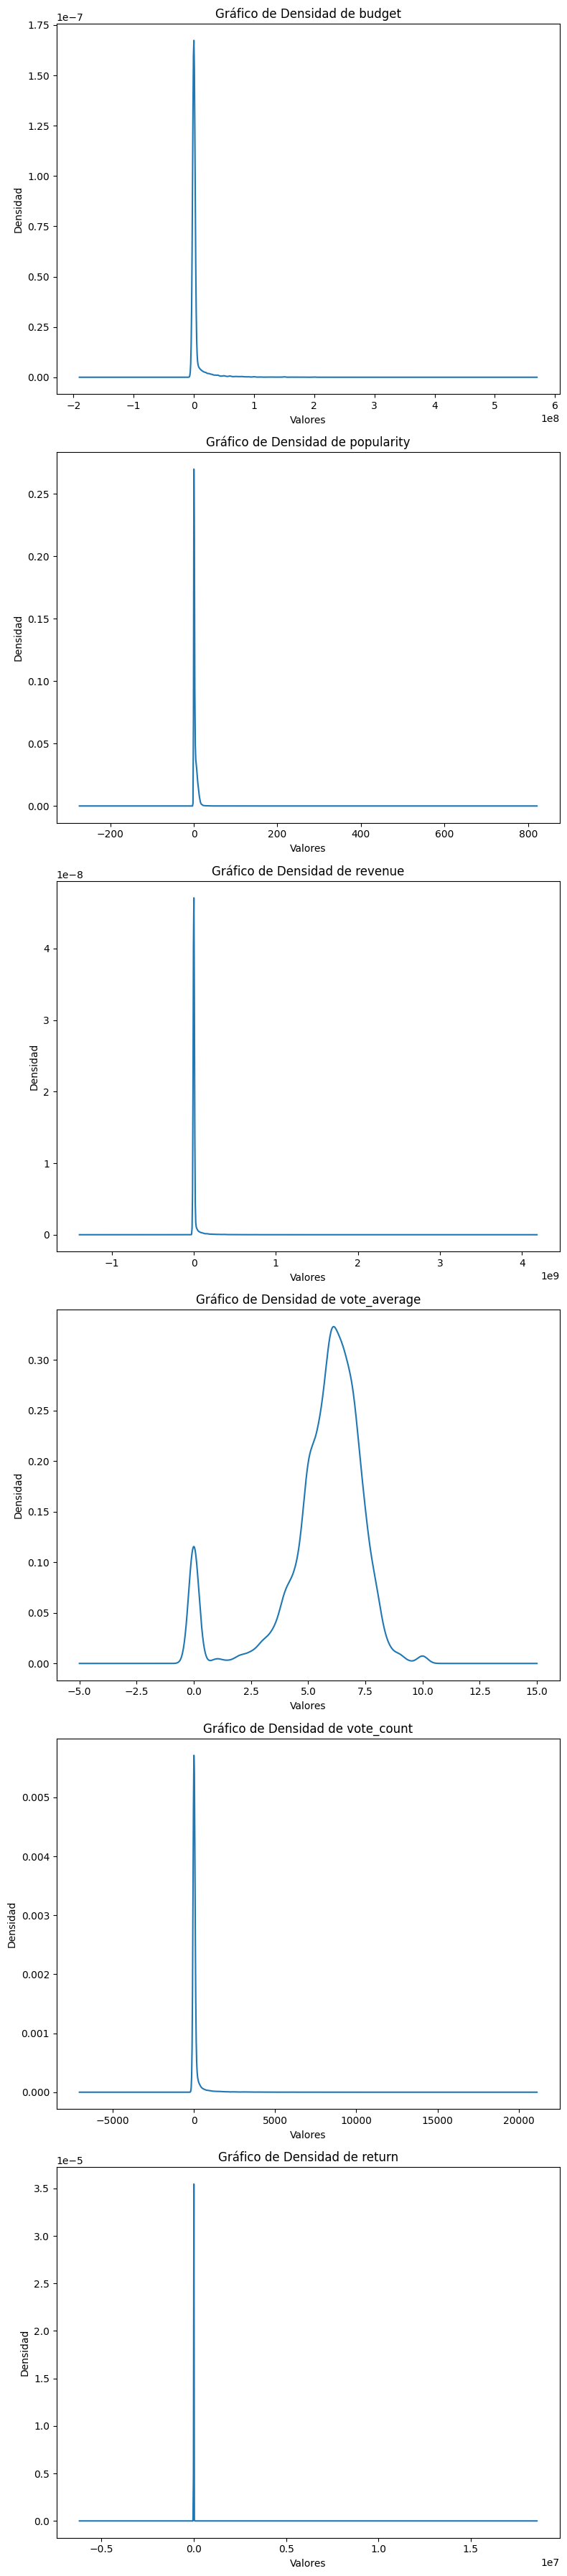

In [ ]:
# Variables a incluir en el gráfico de densidad
variables = ["budget", "popularity", "revenue", "vote_average", "vote_count", "return"]

fig, axs = plt.subplots(len(variables), figsize=(8, 6 * len(variables)))

# Generar un gráfico de densidad para cada variable
for i, variable in enumerate(variables):
    ax = axs[i] if len(variables) > 1 else axs  # Utilizar un solo eje si solo hay una variable

    # Crear el gráfico de densidad para la variable actual
    ax = movies_numericas[variable].plot(kind='density', ax=ax)

    # Configurar los ejes y el título del gráfico
    ax.set_xlabel('Valores')
    ax.set_ylabel('Densidad')
    ax.set_title(f'Gráfico de Densidad de {variable}')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Estos gráficos muestran que en efecto, las variables numéricas analizadas podrían estar sesgada o con una distribución cercana al valor cero.

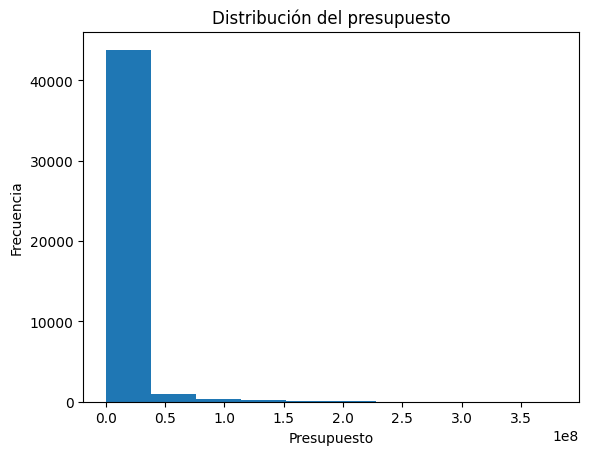

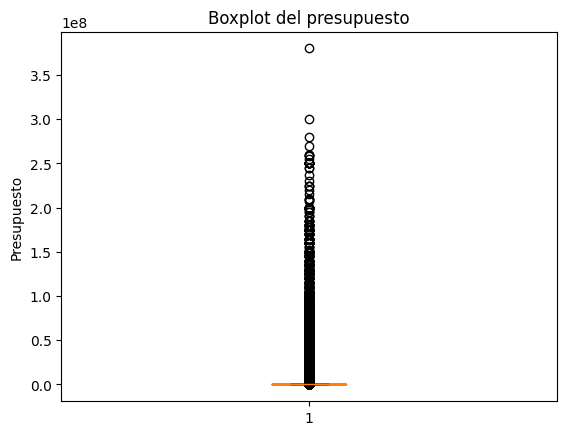

Media: 4232604.385071403
Mediana: 0.0
Desviación estándar: 17439859.557955146


In [ ]:
# A modo de resumen o alternativa al análisis previo es posible revisar "budget" de forma representativa

# Histograma
plt.hist(movies3['budget'], bins=10)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución del presupuesto')
plt.show()

# Boxplot
plt.boxplot(movies3['budget'])
plt.ylabel('Presupuesto')
plt.title('Boxplot del presupuesto')
plt.show()

# Estadísticas descriptivas
mean = movies3['budget'].mean()
median = movies3['budget'].median()
std = movies3['budget'].std()
print(f"Media: {mean}")
print(f"Mediana: {median}")
print(f"Desviación estándar: {std}")


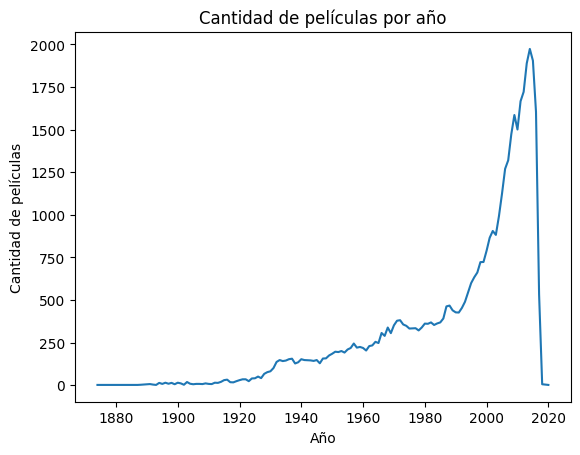

In [ ]:
# Análisis de variables temporales

# Conversión de la columna a tipo datetime
movies3['release_date'] = pd.to_datetime(movies3['release_date'])

# Gráfico de líneas por año
movies3['release_year'] = movies3['release_date'].dt.year
year_counts = movies3['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas por año')
plt.show()


El análisis unicariado de los estrenos nos indica que hay un incremento de pelìculas estrenadas a lo largo de los años (concordante con el crecimiento de la industria cinematográfica)


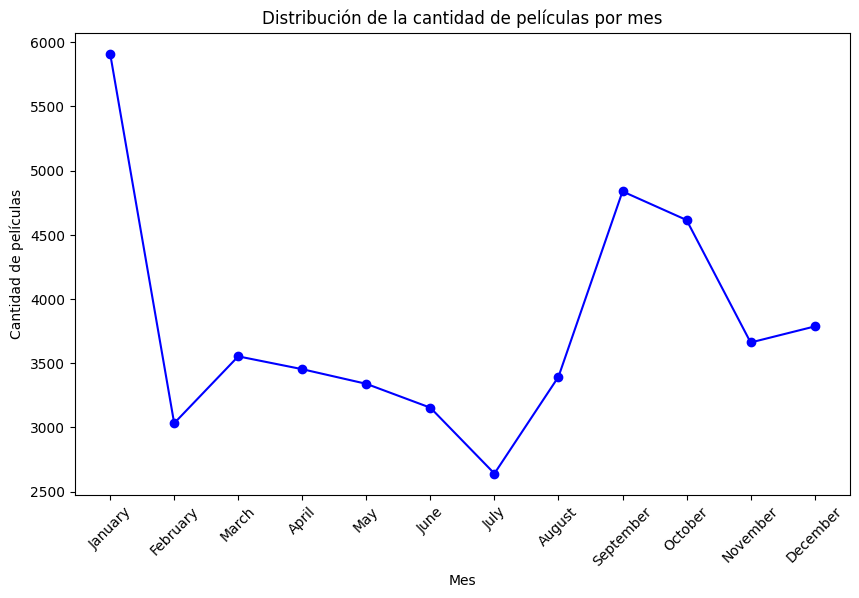

In [ ]:
# Análisis de variables temporales
# Análisis mensual
movies3['release_month'] = movies3['release_date'].dt.month
monthly_counts = movies3['release_month'].value_counts().sort_index()

# Generar el gráfico de distribución de frecuencias
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='b')

# Configurar los ejes y el título del gráfico
plt.xlabel('Mes')
plt.ylabel('Cantidad de películas')
plt.title('Distribución de la cantidad de películas por mes')

# Mostrar los meses en el eje x en formato de nombre de mes
plt.xticks(monthly_counts.index, calendar.month_name[1:13], rotation=45)

# Mostrar el gráfico
plt.show()



Por otro lado, este gráfico nos indica que en el dataset la gran mayoría de películas fueron estrenadas en enero y luego en septiembre.

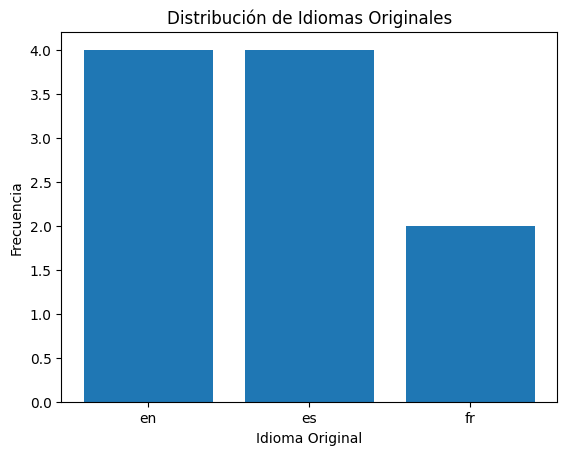

In [ ]:
# Análisis de variable categórica "original_language"
data = {
    'original_language': ['en', 'es', 'fr', 'en', 'en', 'fr', 'es', 'en', 'es', 'es']
}
movies3a = pd.DataFrame(data)

# Calcular la frecuencia de cada valor en la variable "original_language"
value_counts = movies3a['original_language'].value_counts()

# Generar un gráfico de barras para visualizar la distribución de los valores
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Idioma Original')
plt.ylabel('Frecuencia')
plt.title('Distribución de Idiomas Originales')
plt.show()


En este caso podemos ver que el dataset contiene gran cantidad de pelìculas cuyo idioma original es español o inglés.

# Análisis bivariable

Se observan algunas relaciones entre pares de variables, buscando correlaciones y patrones interesantes que puedan surgir.

In [ ]:
movies4 = movies3.copy()

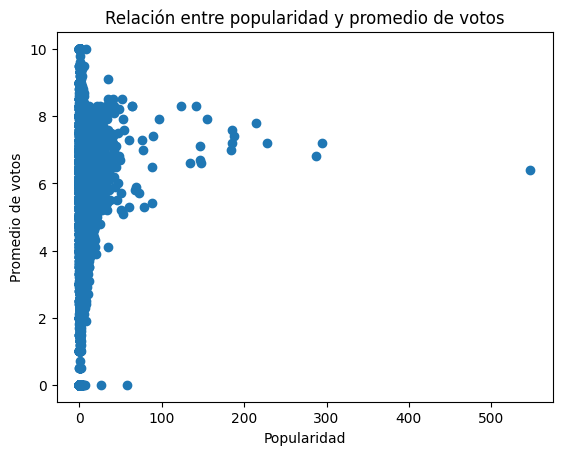

In [ ]:
# Filtrar las filas con valores no nulos en las columnas "popularity" y "vote_average"
filtered_movies = movies4.dropna(subset=["popularity", "vote_average"])

# Crear el gráfico de dispersión
plt.scatter(filtered_movies["popularity"], filtered_movies["vote_average"])

# Configurar los ejes y el título del gráfico
plt.xlabel("Popularidad")
plt.ylabel("Promedio de votos")
plt.title("Relación entre popularidad y promedio de votos")

# Mostrar el gráfico
plt.show()


El análisis de la popularidad y el promedio de votos, pareciera indicar que hay mayor cantidad de votos en las películas con menor valoración.

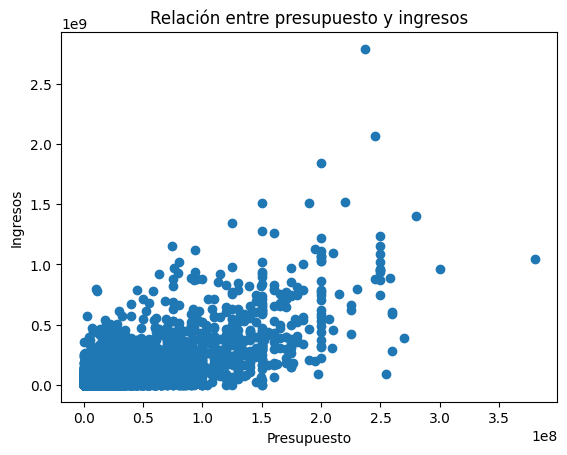

In [ ]:
# Filtrar las filas con valores no nulos en las columnas "budget" y "revenue"
filtered_movies = movies4.dropna(subset=["budget", "revenue"])

# Crear el gráfico de dispersión
plt.scatter(filtered_movies["budget"], filtered_movies["revenue"])

# Configurar los ejes y el título del gráfico
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.title("Relación entre presupuesto y ingresos")

# Mostrar el gráfico
plt.show()


Mientras que la relación de presupuestos e ingresos pareciera señalar que los ingresos son menores a menor presupuesto de la película


# Análisis multivariable:
Aquí se revisan las interacciones entre múltiples variables, considerando su influencia conjunta en diferentes aspectos de las películas.
En este caso se desarrollan alternativas a las visualizaciones.

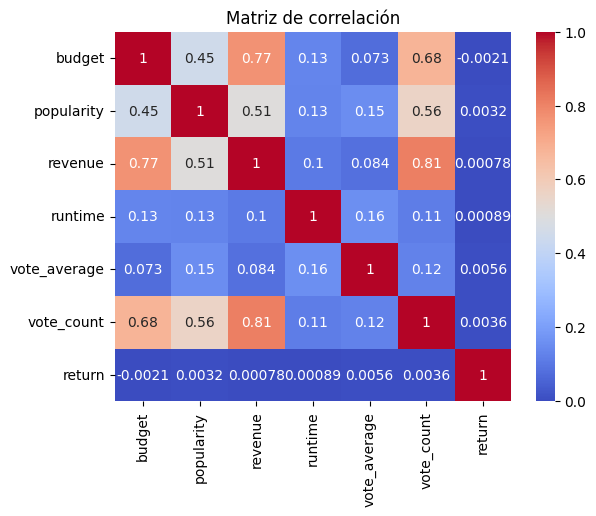

In [ ]:
# Mapa de calor
movies5 = movies3.copy()
# Filtrar las columnas numéricas
numeric_columns = ["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count", "return"]

# Filtrar las filas con valores no nulos en las columnas numéricas
filtered_movies = movies5.dropna(subset=numeric_columns)

# Calcular la matriz de correlación
correlation_matrix = filtered_movies[numeric_columns].corr()

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Mostrar el gráfico
plt.title("Matriz de correlación")
plt.show()


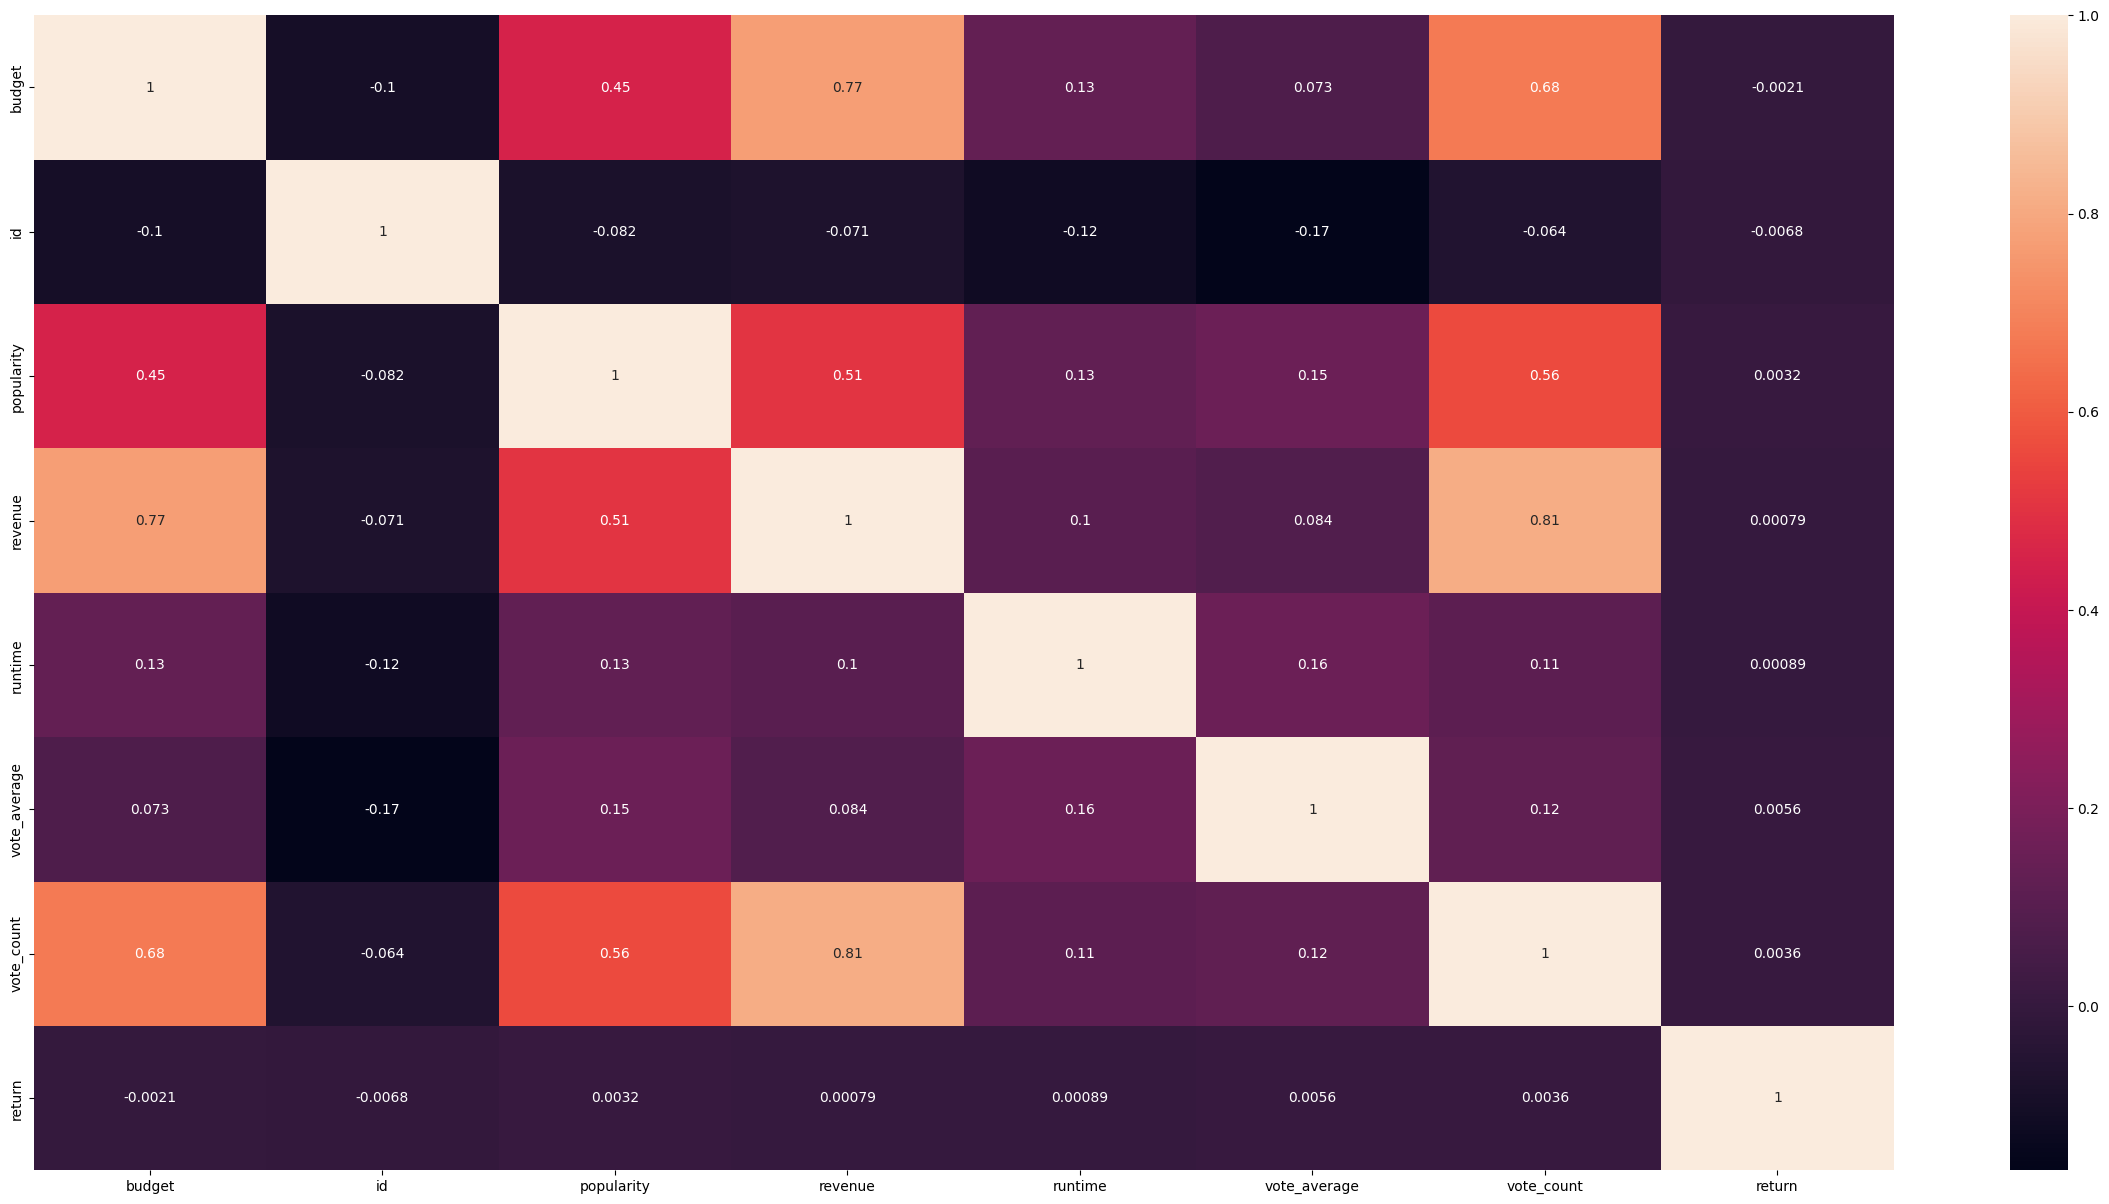

In [ ]:
fig, ax=plt.subplots(figsize=(30,15))
ax=sns.heatmap(movies_numericas.corr(),annot=True)
plt.show()

En ambos gráficos es posible notar que la variable "return" permanece uniforme.
Mientras que "revenue" y "budget", asi como "revenue" y "vote_count" tienen valores mas cercanos a 1, lo que indicaría una posible correlación positiva.

<ipython-input-88-d6b34f05fbf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = movies5.corr()


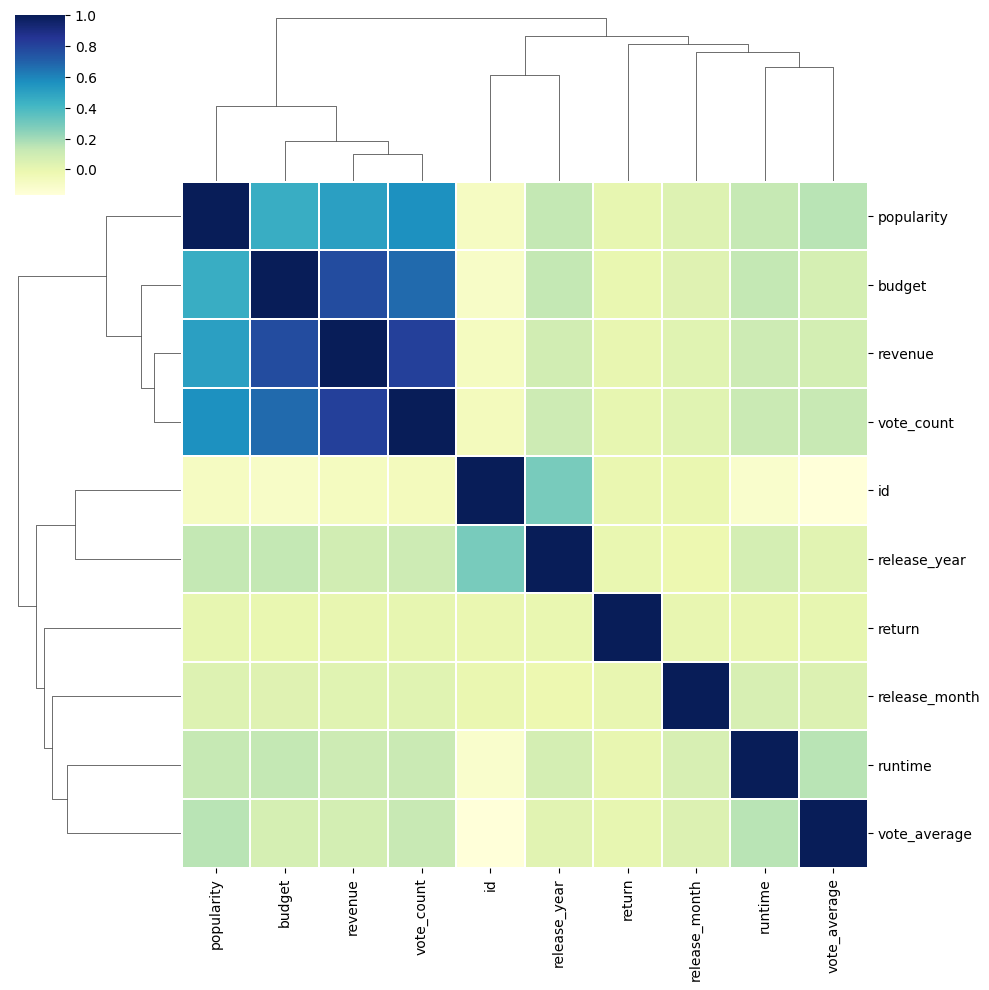

In [ ]:
#Otra forma de graficar nuestros resultados:
corrmat = movies5.corr()
grafico = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(grafico.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
grafico

Donde "popularity", "budge", "revenue" y "vote_count" parecen estar más relacionadas entre si que con otras variables.

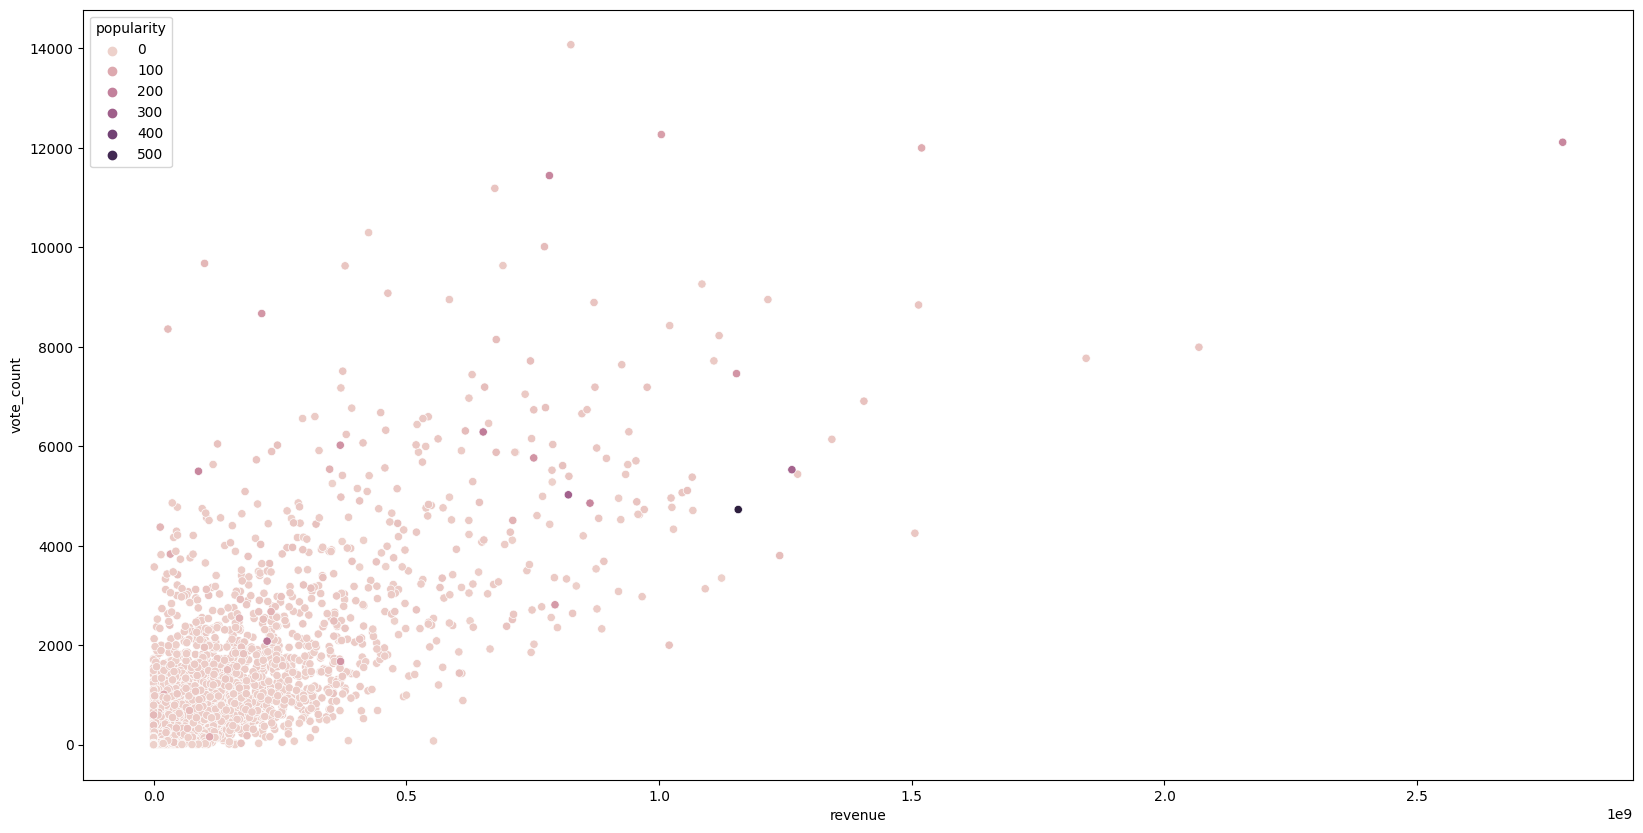

In [ ]:
# Si al gráfico previamente realizado ("revenue-budget") lo modificamos para ver en este caso la relación entre
# "revenue", "vote_count" y "popularity"
plt.figure(figsize=(20,10))
sns.scatterplot(data=movies_numericas, x="revenue",y="vote_count",hue = 'popularity')
plt.show()

Podemos notar que la distribución de los datos es similar a la obtenida anteriormente, aunque en este caso se pueden visualizar algunos puntos con mayor "popularity" en un punto medio de los ejes de "revenue" y "vote_count", lo que podria indicar que la popularidad no se encuentra relacionada a las otras variables de forma directa.

In [ ]:
!pip install matplotlib==3.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.2.2-cp310-cp310-linux_x86_64.whl size=12292078 sha256=1f6ac0357df99114740cae0a6345293332195302832f0fa548cc7ef9583a7e58
  Stored in directory: /root/.cache/pip/wheels/bb/81/f3/48b8bd245846ae69fcb2281c84e848bfea1f5260a870c148ae
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.2.2 which is incompatible.
plotnine 0.10.1 requires matplot

In [ ]:
# Convertir los valores de 'title' y 'overview' a tipo 'str'
movies7= movies3.copy()
movies7['title'] = movies7['title'].astype('str')
movies7['overview'] = movies7['overview'].astype('str')
titulo_texto = ' '.join(movies7['title'])
overview_texto = ' '.join(movies7['overview'])
# Libreria Wordcloud
titulo_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(titulo_texto) # !pip install matplotlib==3.2.2 en colab

plt.figure(figsize=(13,8))
plt.imshow(titulo_wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Otra alternativa es realizar la cuenta de las palabras del título
movies6 = movies3.copy()
all_titles = ' '.join(movies5['title'].astype(str))
all_titles_lower = all_titles.lower()
words = all_titles_lower.split()
from collections import Counter
word_frequencies = Counter(words)
top_words = word_frequencies.most_common(10)
for word, count in top_words:
    print(f'{word}: {count}')

the: 14546
of: 4925
a: 2236
in: 1688
and: 1621
to: 1051
man: 639
love: 635
for: 599
on: 578


La palabra "the" es la más frecuente, lo cual es común en muchos títulos debido a su uso generalizado en el idioma inglés. Es posible que esta palabra se utilice como un artículo definido en muchos títulos.

Otras palabras comunes en los títulos son "of", "a", "in", "and", "to". Estas palabras son utilizadas en diferentes contextos y pueden no proporcionar información específica sobre el contenido de las películas.

También encontramos palabras que pueden tener una connotación más temática o emocional, como "man", "love". Estas palabras podrían indicar la presencia de películas centradas en personajes o relaciones románticas.

Algunas palabras, como "for" y "on", podrían indicar el propósito o contexto de la película, como "for" que podría implicar un propósito o destino y "on" que podría indicar una situación o ubicación.

In [ ]:
# Y las de overview
all_over = ' '.join(movies6['overview'].astype(str))
all_over_lower = all_over.lower()
words2 = all_over_lower.split()
word_frequencies2 = Counter(words2)
top_words2 = word_frequencies2.most_common(25)
for word, count in top_words2:
    print(f'{word}: {count}')

the: 137072
a: 98602
and: 74605
to: 73148
of: 69473
in: 47819
is: 36157
his: 36091
with: 23719
he: 20373
her: 19888
for: 18119
on: 17142
an: 16730
by: 15706
that: 15206
as: 14668
who: 14040
their: 13141
from: 12430
but: 10839
when: 10736
they: 10100
she: 9625
has: 9455


Hay varias palabras comunes en el idioma inglés, como "the", "a", "and", "to", "of", "in", "is", "his", "with", entre otras. Estas palabras son muy comunes en los textos en general y pueden no brindar información relevante sobre el contenido de los resúmenes.

Algunas palabras están relacionadas con pronombres y posesivos, como "his", "he", "her", "their", "they", "she". Estas palabras podrían indicar que los resúmenes a menudo se refieren a personajes y sus acciones o relaciones.

También encontramos palabras que pueden indicar acciones o relaciones, como "has", "from", "by", "when", "that", "as", "who". Estas palabras podrían indicar eventos, situaciones o características importantes mencionadas en los resúmenes.



En general, el conteo de palabras más frecuentes en los resúmenes puede proporcionar una idea general del lenguaje utilizado y los temas más comunes en las películas. Sin embargo, es importante tener en cuenta que las palabras más frecuentes pueden no ser necesariamente las más relevantes para analizar el contenido específico de cada película.


# CREW
Procesar y graficar actores y directores - Merge

In [ ]:
# Cargar el archivo .csv en el dataframe
crew = pd.read_csv('Proyecto1_crew.csv', low_memory=False)

In [ ]:
crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cast           45476 non-null  object
 1   crew           45476 non-null  object
 2   id             45476 non-null  int64 
 3   cast_eval      45476 non-null  object
 4   crew_eval      45476 non-null  object
 5   crew_size      45476 non-null  int64 
 6   cast_size      45476 non-null  int64 
 7   Name_actors    43058 non-null  object
 8   Names_crew     44705 non-null  object
 9   Director_name  44705 non-null  object
 10  D_Name         44705 non-null  object
 11  D_LastName     44434 non-null  object
 12  director       44589 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.5+ MB


In [ ]:
crew.head(2)

,cast,crew,id,cast_eval,crew_eval,crew_size,cast_size,Name_actors,Names_crew,Director_name,D_Name,D_LastName,director
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,13,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...",John Lasseter,John,Lasseter,John Lasseter
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,26,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Larry J. Franco, Jonathan Hensleigh, James Hor...",Larry J. Franco,Larry J.,Franco,Joe Johnston


In [ ]:
# Eliminar columnas redundantes
crew2 = crew.copy()
eliminar = ["cast", "crew", "cast_eval", "crew_eval"]
crew2 = crew2.drop(eliminar, axis=1)
crew2.info() # este df contiene 9 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             45476 non-null  int64 
 1   crew_size      45476 non-null  int64 
 2   cast_size      45476 non-null  int64 
 3   Name_actors    43058 non-null  object
 4   Names_crew     44705 non-null  object
 5   Director_name  44705 non-null  object
 6   D_Name         44705 non-null  object
 7   D_LastName     44434 non-null  object
 8   director       44589 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.1+ MB


In [ ]:
# Sumarlo a df movies3
movies_crew = movies3.merge(crew2, on="id")
movies_crew.info() # ahora tenemos 26 columnas y 45450 datos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45451 entries, 0 to 45450
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   budget                  45451 non-null  float64       
 1   id                      45451 non-null  float64       
 2   original_language       45440 non-null  object        
 3   overview                44510 non-null  object        
 4   popularity              45451 non-null  float64       
 5   release_date            45451 non-null  datetime64[ns]
 6   revenue                 45451 non-null  float64       
 7   runtime                 45205 non-null  float64       
 8   spoken_languages        45451 non-null  object        
 9   status                  45371 non-null  object        
 10  title                   45451 non-null  object        
 11  vote_average            45451 non-null  float64       
 12  vote_count              45451 non-null  float6

<Axes: >

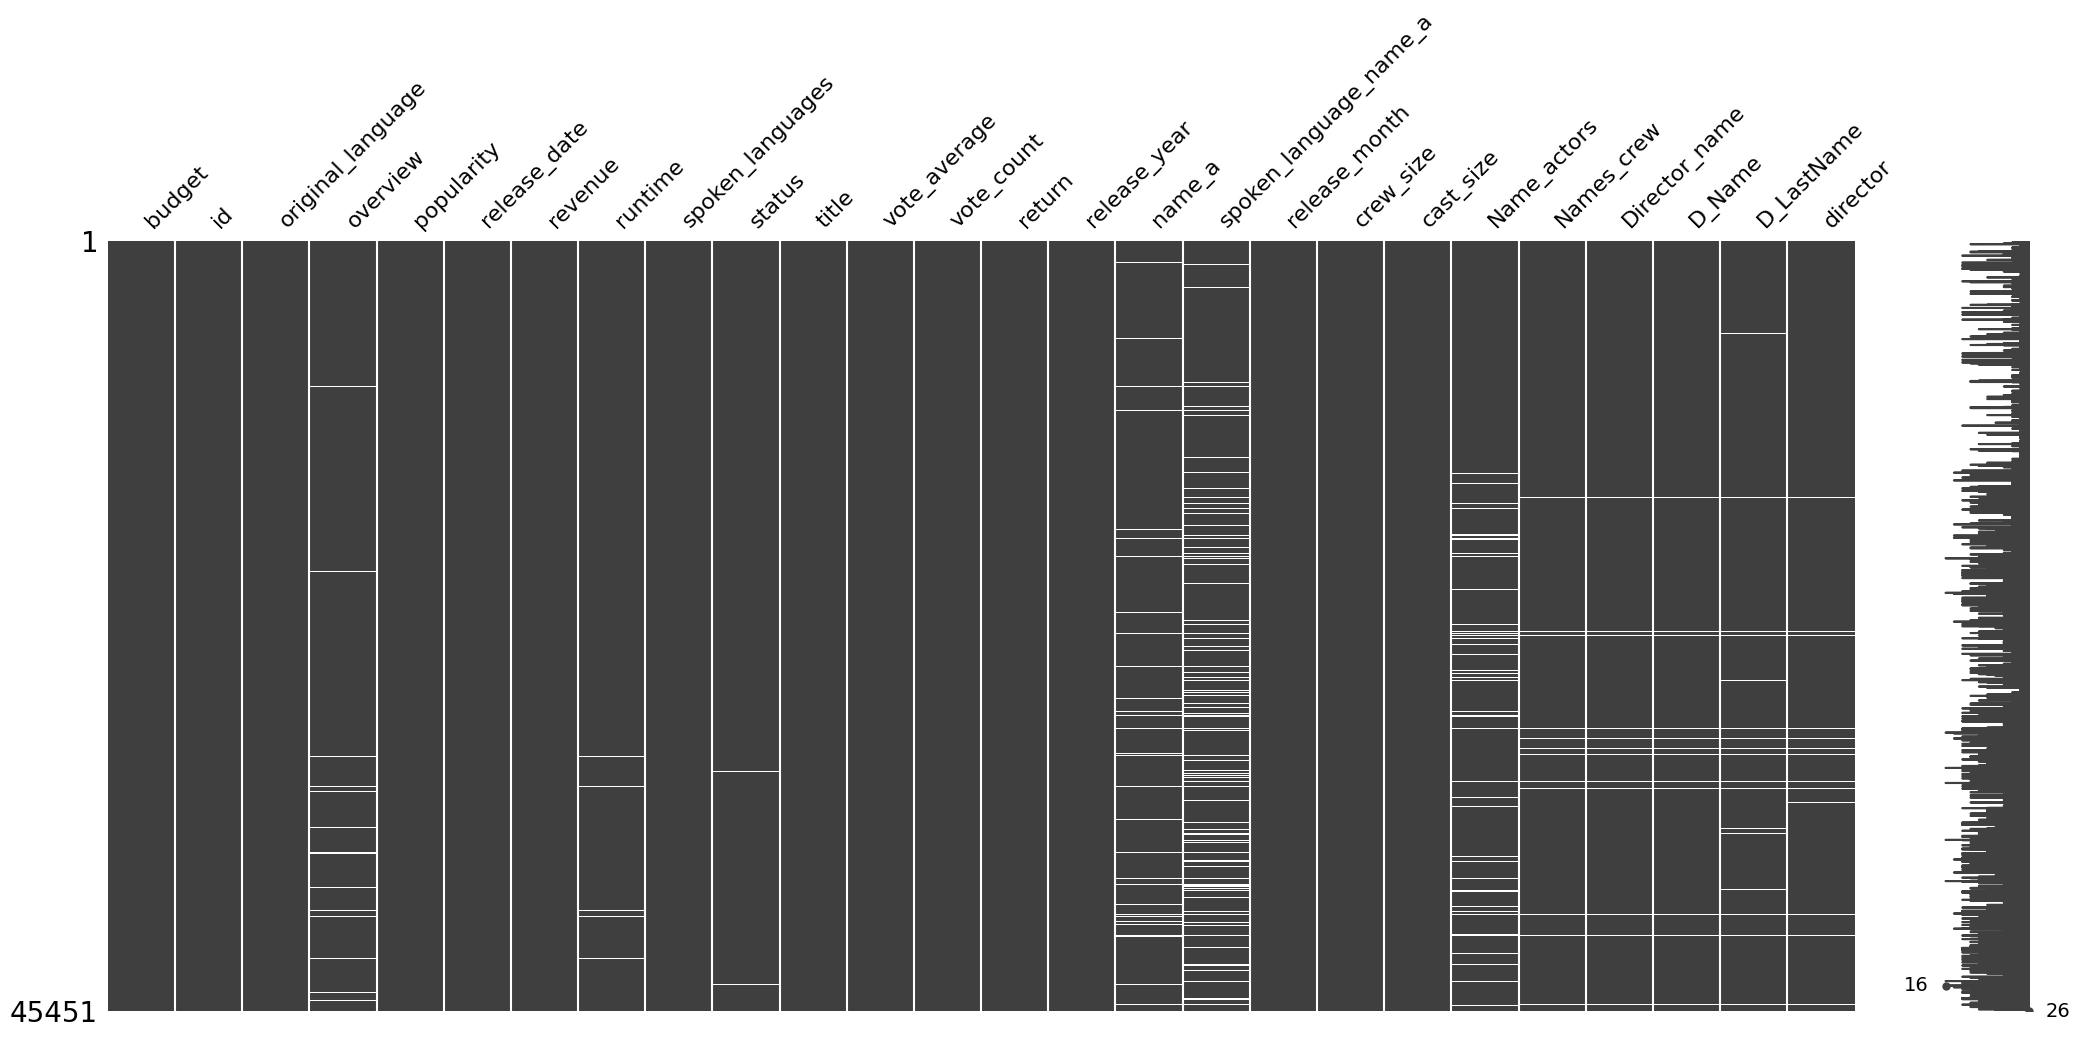

In [ ]:
msno.matrix(movies_crew)

##########################################################

In [ ]:
# Eliminar las celdas vacías de todas las filas
df_Total = movies_crew.dropna(subset=['Name_actors', 'Names_crew'])

In [ ]:
df_Total.info() # ahora tenemos 26 columnas y 45449 filas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42751 entries, 0 to 45449
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   budget                  42751 non-null  float64       
 1   id                      42751 non-null  float64       
 2   original_language       42744 non-null  object        
 3   overview                41913 non-null  object        
 4   popularity              42751 non-null  float64       
 5   release_date            42751 non-null  datetime64[ns]
 6   revenue                 42751 non-null  float64       
 7   runtime                 42551 non-null  float64       
 8   spoken_languages        42751 non-null  object        
 9   status                  42703 non-null  object        
 10  title                   42751 non-null  object        
 11  vote_average            42751 non-null  float64       
 12  vote_count              42751 non-null  float6

<Axes: >

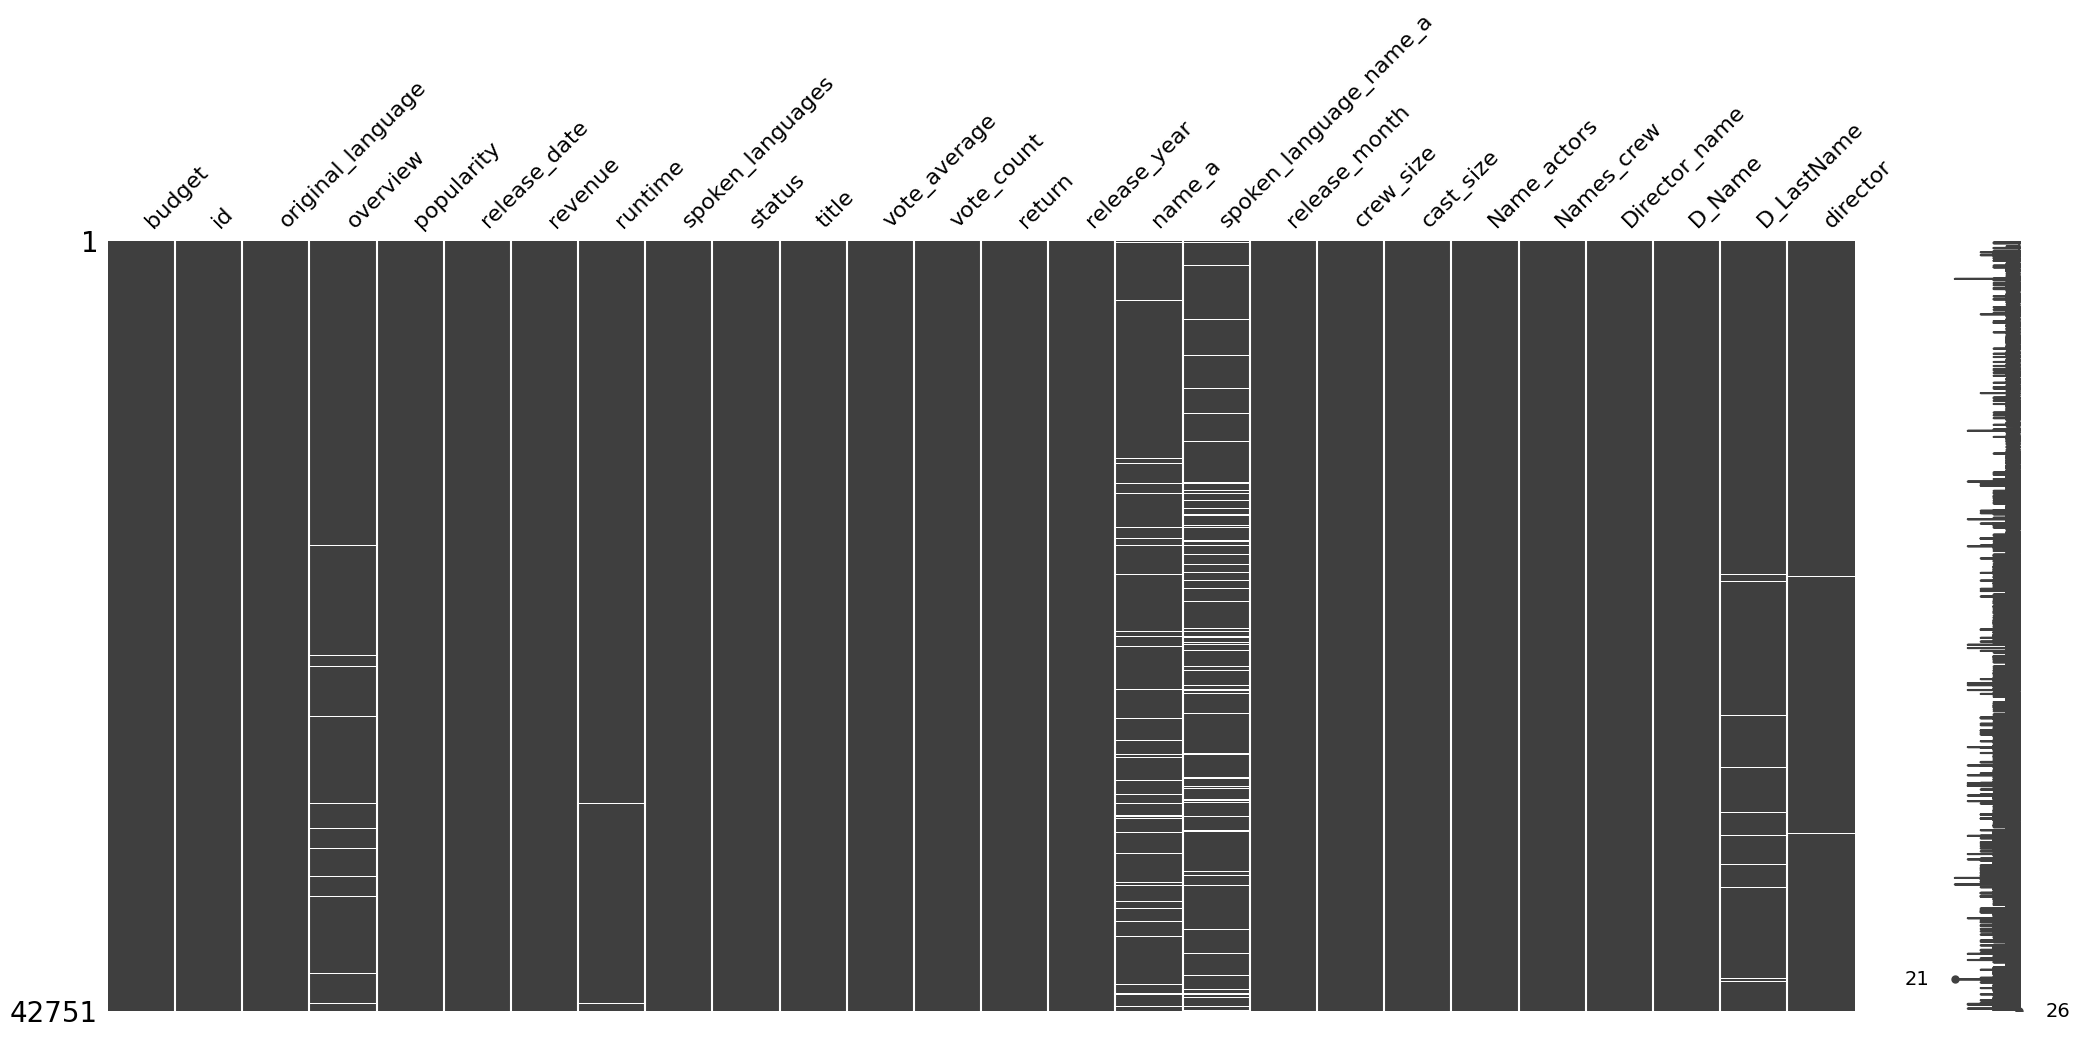

In [ ]:
msno.matrix(df_Total)

In [ ]:
# Especificar la ruta y el nombre del archivo CSV de destino
ruta_archivo = '/content/sample_data/df_Total.csv'

# Exportar el DataFrame a un archivo CSV
df_Total.to_csv(ruta_archivo, index=False)

# Leer el archivo CSV y mostrar los datos
df_exportado = pd.read_csv(ruta_archivo)

# Conclusiones

Después de realizar un Análisis Exploratorio de Datos (EDA) en el conjunto de datos, se pueden obtener varias conclusiones importantes:

Las columnas "budget" y "revenue" contienen información financiera sobre las películas, lo que puede ser relevante para analizar el rendimiento económico y la rentabilidad de las mismas. Al explorar la relación entre el presupuesto y los ingresos parece indicar que hay una mayor cantidad con bajos presupuestos iniciales (costos de producción), y que en general suelen obtener pocas ganancias.

La columna "popularity" indica la popularidad de las películas, lo cual puede ser útil para identificar aquellas que tienen mayor aceptación y atractivo entre el público. En general las peliculas parecen tener una popularidad baja, salvo algunos puntos que se podrían considerar "outliers". A futuro se pued profundizar en conocer si existe alguna correlación con otras variables.

La columna "release_date" proporciona información sobre la fecha de lanzamiento de las películas. En este aspecto es posible ver el incremente de la cantidad de estrenos a lo largo de los años, concordante con Es importante analizar si hay patrones o tendencias en el lanzamiento de películas a lo largo del tiempo, como estacionalidad o períodos de mayor actividad. Esto puede ayudar a comprender las preferencias del público en diferentes momentos del año.

La columna "vote_average" representa el promedio de votos recibidos por las películas. Analizar la distribución de las calificaciones puede brindar información sobre la calidad percibida de las películas. En este sentido, pudimos observar que hay una media de aproximadamente 5.62.  A futuro serría insteresante investigar si existe alguna relación entre la calificación promedio y otras variables, aunque en principio esto no fue observado.

Las columnas relacionadas con el idioma, como "original_language" y "spoken_languages", permiten explorar la diversidad lingüística en las películas. Se pudo notar que la gran mayoria del dataset presentan 3 idiomas: español, inglés o francés.

A futuro también se puede considerar a las columnas que contienen información sobre el elenco y el equipo de producción, como "cast_size", "crew_size", "Name_actors", "Names_crew", "Director_name", "D_Name", "D_LastName" y "director", para analizar el impacto de los actores y el equipo de producción en el éxito de las películas. Se podría explorar la relación entre la presencia de ciertos actores o directores y el rendimiento de las películas.


La siguiente etapa es el desarrollo de un sistema de recomendación en ML